In [ ]:
!pip install pmdarima==1.2.1

     |████████████████████████████████| 921kB 11.4MB/s 
     |████████████████████████████████| 24.8MB 1.6MB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.3 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.2.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
#mounting for using dataset and saving work
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


In [ ]:
  #All the stock market abbrevations used for companies   
stocks = {'AXP':'American Express Financial services',
'AAPL':'Apple Technology',
'AMZN':'Amazon.com E-commerce',
'ADBE':'Adobe Computer software',
'ADS':'Alliance Data Systems Corporation',
'BA':'Boeing Aerospace',
'BAC':'Bank of America Investment banking',
'CAT':'Caterpillar Inc. Construction machinery and equipment',
'CVX':'Chevron Corporation Oil industry',
'CSCO':'Cisco Systems Networking hardware',
'COST':'Costco Retail',
'DIS':'The Walt Disney Company Mass media',
'FB':'Facebook Social Media',
'GE':'General Electric Multinational conglomerate',
'GS':'Goldman Sachs Investment banking',
'GOOGL':'Alphabet Inc. Multinational conglomerate',
'HD':'The Home Depot Home improvement',
'HDB':'HDFC Bank Financial services',
'HOG':'Harley:Davidson motorcycle manufacturer',
'IBM':'IBM Computer hardware',
'INTC':'Intel Semiconductor',
'INFY':'Infosys Information technology consulting',
'JNJ':'Johnson & Johnson Medical device',
'JPM':'JPMorgan Chase Investment banking',
'JBHT':'J.B. Hunt Transportation and Logistics',
'KO':'The Coca:Cola Company Beverages',
'KEX':'Kirby Corporation Transportation',
'MCD':"McDonald's Fast food",
'MSFT':'Microsoft Corporation Technology',
'MMM':'3M Multinational conglomerate',
'MRK':'Merck & Co. Pharmaceutical',
'NFLX':'Netflix Production',
'NKE':'Nike Footwear manufacturing',
'NVDA':'Nvidia Computer Hardware and Software', 
'PFE':'Pfizer Pharmaceutical',
'PG':'Procter & Gamble Consumer Goods',
'PEP':'PepsiCo Food',
'REGN':'Regeneron Pharmaceuticals Biotechnology',
'SBUX':'Starbucks Coffeehouse',
'TRV':'The Travelers Companies Insurance',
'TGT':'Target Corporation Retail',
'T':'AT&T Telecommunications',
'UTX':'Raytheon Technologies Corporation Aircraft manufacturing',
'UNH':'UnitedHealth Group Managed care',
'UPS':'United Parcel Service Logistics',
'UNP':'Union Pacific Corporation Transport',
'VZ':'Verizon Communications Telecommunications',
'WMT':'Walmart Retail',
'XOM':'ExxonMobil multinational oil and gas',
'YUM':'Yum! Brands Fast food'}


In [ ]:
path='drive/My Drive/data/' + 'DIS' + '_2006-01-01_to_2020-09-30.csv'
  #reading dataset by indexing 'Date' column for ARIMA function properly
data = pd.read_csv(path, index_col='Date', parse_dates=['Date'])
  #droping column
data = data.drop(['Name'], axis=1)
data = data['Adj Close']

In [ ]:
  #changing dataset to log(dataset) values
data = np.log(data)
  #splitting dataset for train and test
train_data, test_data = data[3:int(len(data)*0.9)], data[int(len(data)*0.9):]

In [ ]:
  #calculating p,d,q values for ARIMA based on training data 
  #auto_arima process identifies the most optimal parameters for an ARIMA model
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       #type of root test
                      max_p=4, max_q=4, #max_p is the max value of AR and max_q is the max value of MA
                      m=1,              #annual data
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
#summary to choose p,d,q value and update it accordingly in arima function
print(model_autoARIMA.summary())

Fit ARIMA: order=(0, 1, 0); AIC=-18035.649, BIC=-18023.423, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-18046.066, BIC=-18027.729, Fit time=0.092 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-18047.859, BIC=-18029.521, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-18052.122, BIC=-18027.672, Fit time=0.513 seconds
Fit ARIMA: order=(1, 1, 2); AIC=-18059.012, BIC=-18028.449, Fit time=0.573 seconds
Fit ARIMA: order=(2, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2); AIC=-18057.813, BIC=-18033.363, Fit time=0.125 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-18061.119, BIC=-18024.444, Fit time=0.864 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-18060.507, BIC=-18029.944, Fit time=0.525 seconds
Fit ARIMA: order=(3, 1, 3); AIC=-18062.222, BIC=-18013.322, Fit time=3.840 seconds
Fit ARIMA: order=(4, 1, 3); AIC=-18064.057, BIC=-18009.044, Fit time=5.941 seconds
Fit ARIMA: order=(4, 1, 2); AIC=-18070.826, BIC=-18021.926, Fit time=3.962 seconds
Fit ARIMA: order=(3,

In [ ]:
  #using the predicted p,d,q value from above result to train the arima model
model = ARIMA(train_data, order=(4, 1, 2))  
  #fits model by exact maximum likelihood
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 3336
Model:                 ARIMA(4, 1, 2)   Log Likelihood                9043.413
Method:                       css-mle   S.D. of innovations              0.016
Date:                Mon, 30 Nov 2020   AIC                         -18070.826
Time:                        13:31:24   BIC                         -18021.926
Sample:                             1   HQIC                        -18053.331
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0005      0.000      2.105      0.035    3.58e-05       0.001
ar.L1.D.Adj Close     0.3799      0.038     10.066      0.000       0.306       0.454
ar.L2.D.Adj Close    -0.

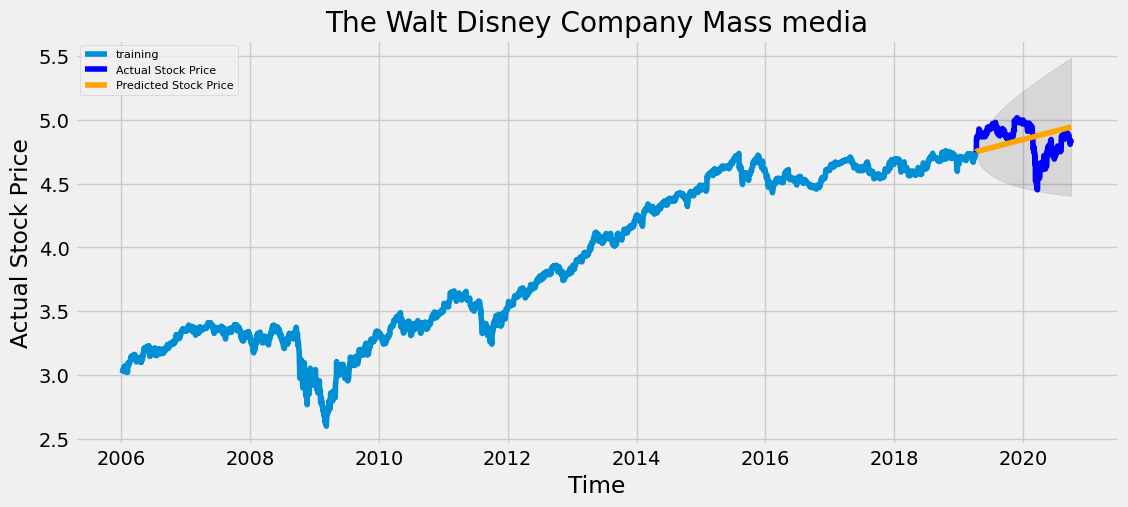

In [ ]:
  #forecast or predicting the stock prices and comparing it in the graph 
fc, se, conf = fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
  #plotting the forecasted data with the original data in the same graph
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title(stocks['DIS'])
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)

plt.savefig('drive/My Drive/data/results/new_arima_'+'DIS'+'.png')

plt.show()

In [ ]:
# Generate error data
  #mean squared error
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
  #mean absolute error
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
  #root mean squared error
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
  #mean absolute percentage error
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.022710752759968016
MAE: 0.13406083208664976
RMSE: 0.15070087179564695
MAPE: 0.02787906952336543
